# Projeto: Detecção doenças em lavouras de milho

### Teste de inferência

### Autor

<a href='https://www.linkedin.com/in/pedro-henrique-amorim-de-azevedo-07507b179/' target='_blank'>Pedro Henrique Amorim de Azevedo</a>

### Importar bibliotecas necessárias

In [1]:
%matplotlib inline

import os
import random
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing import image
from keras.applications.imagenet_utils import preprocess_input
from tensorflow.keras.models import load_model

from PIL import Image

# Ocultar avisos desnecessários
import warnings
warnings.simplefilter('ignore', FutureWarning)

2025-04-05 14:35:04.138313: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1743874504.272494  215773 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1743874504.308864  215773 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1743874504.501091  215773 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1743874504.501122  215773 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1743874504.501124  215773 computation_placer.cc:177] computation placer alr

### Carregar modelo treinado

In [6]:
# Carregar o modelo treinado
model = load_model(os.path.join('models', 'classificador_checkpoint.keras')) 

### Conferir as classes que temos

In [7]:
dataset_path = os.path.join('datasets', 'val')
classes = os.listdir(dataset_path)
print(classes)

['saudavel', 'cercospora', 'ferrugem', 'queima_do_norte']


In [8]:
def get_image(path: str):
    img = image.load_img(path, target_size=(224, 224))
    img_arr = image.img_to_array(img)
    img_arr = np.expand_dims(img_arr, axis=0)
    img_arr = preprocess_input(img_arr)
    return img, img_arr

def plot_results(data_class: str, num_images=8):
	selected_images = []

	for _ in range(num_images):
		class_path = os.path.join(dataset_path, data_class)
		image_choice = random.choice(os.listdir(class_path))  # Escolhe uma imagem aleatória
		image_path = os.path.join(class_path, image_choice)
		selected_images.append(image_path)

	predictions = []

	for image in selected_images:
		_, vector = get_image(image)
		pred = model.predict(vector, verbose=0)
		y_pred = np.argmax(pred, axis=1)[0]
		predictions.append(classes[y_pred]) 

	fig, axes = plt.subplots(1, num_images, figsize=(20, 5))

	for i, (image_path, prediction) in enumerate(zip(selected_images, predictions)):
		img = Image.open(image_path)  # Abrir a imagem
		img = img.resize((224, 224))  # Redimensionar para manters o padrão
		axes[i].imshow(img)
		axes[i].axis('off')
		axes[i].set_title(prediction)

	plt.suptitle(f'Amostras da pasta {data_class}', fontsize=16)
	plt.tight_layout(rect=[0, 0, 1, 1.35]) 
	plt.show()

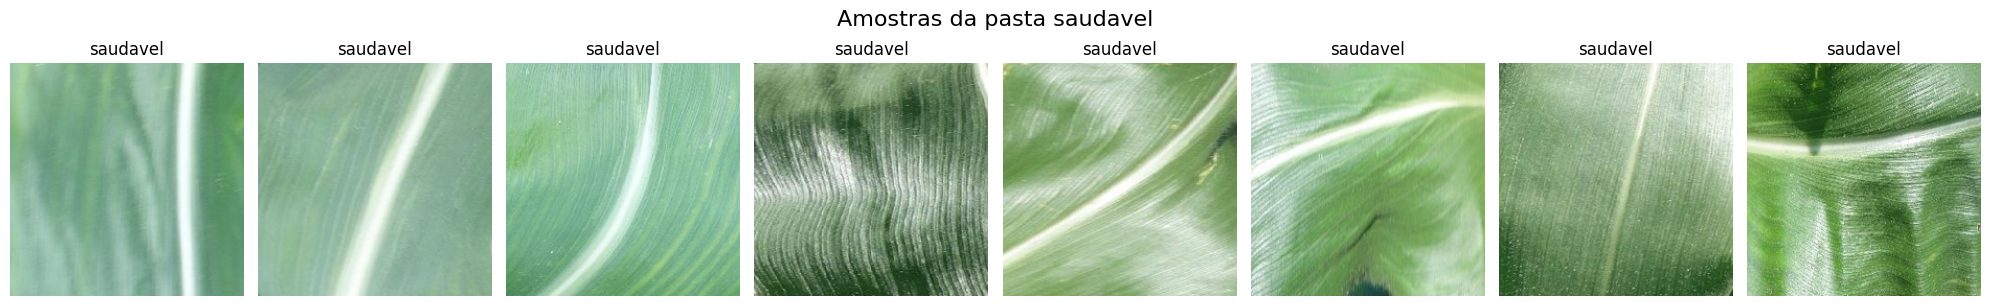

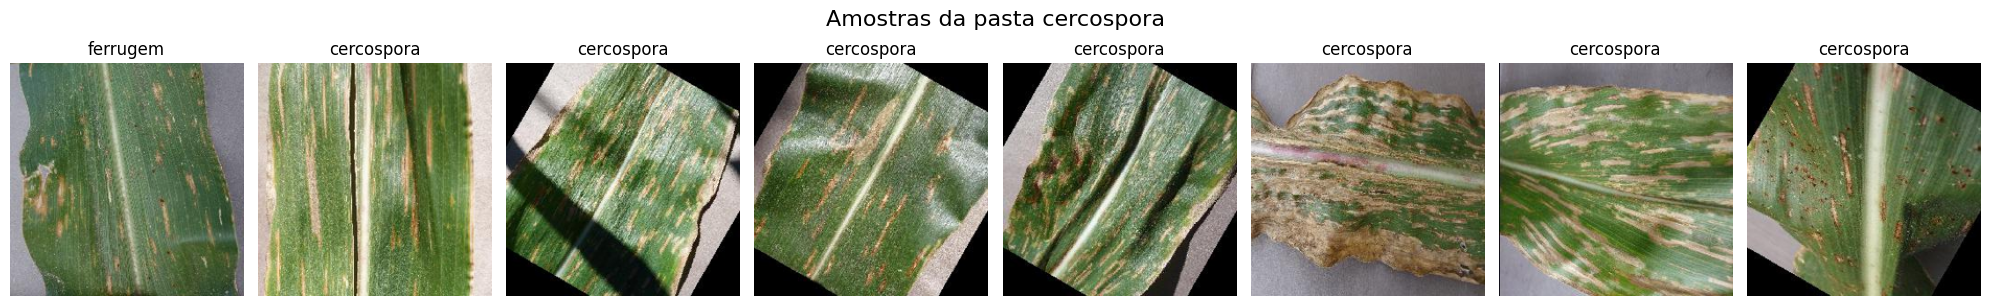

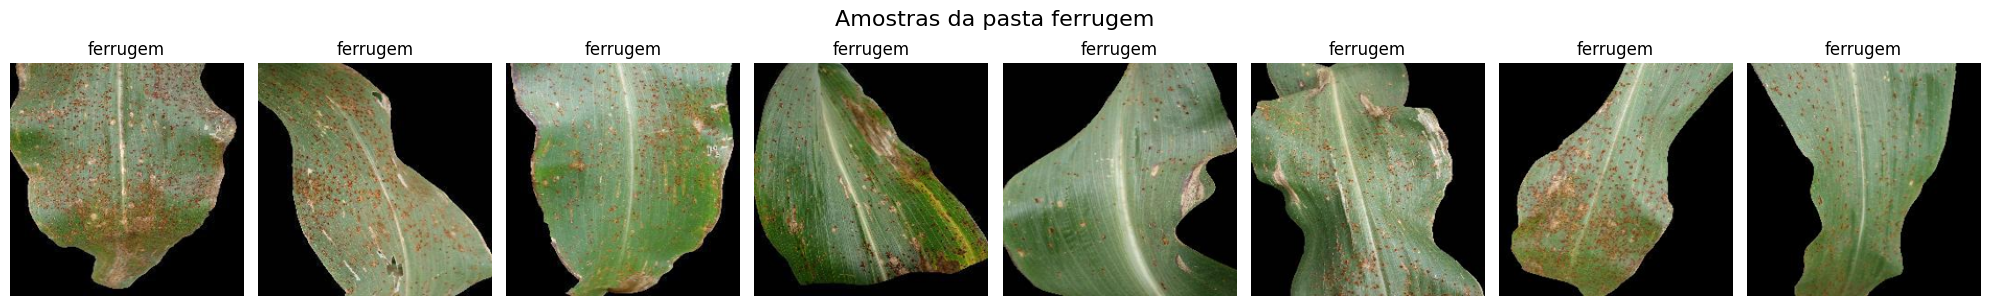

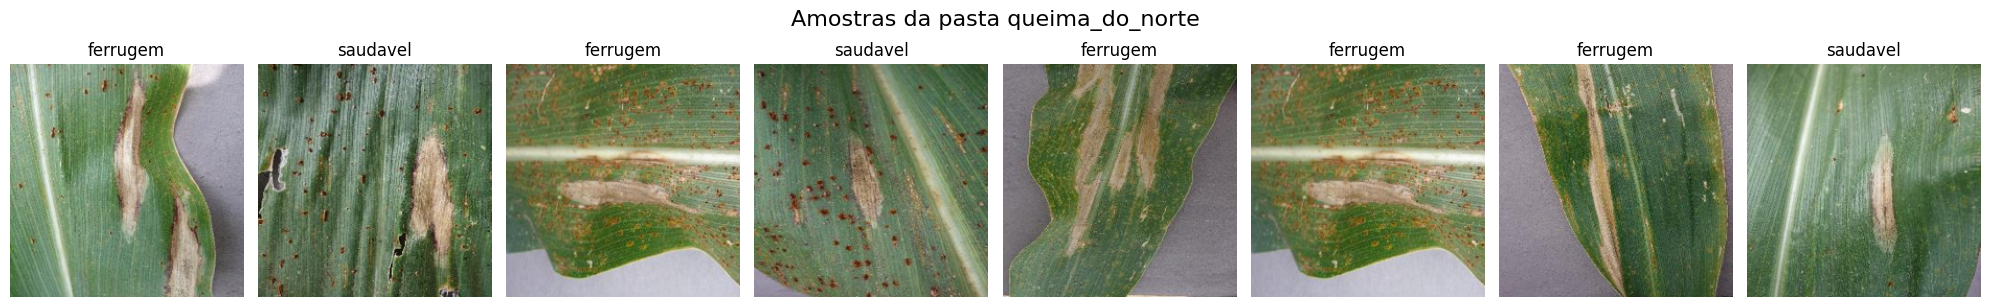

In [9]:
for class_name in classes:
	plot_results(class_name)